In [1]:
# Suppressing warnings
import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Data handling
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Machine Learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Resampling methods
from imblearn.over_sampling import SMOTE, SMOTENC

# Pipeline and model selection
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV

# Web Interaction and Display
from IPython.display import Image, display, HTML

# Additional JavaScript for toggling code display in Jupyter Notebooks
HTML(
    """
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
"""
)

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">TITLE</h1></center>
</div> 

<img src="TitlePage.png" alt="Title" class="center">

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">INTRODUCTION</h1></center>
</div> 

<div style="background-color: #eff1f3; padding: 10px 0;">
    <center><h2 style="color: #223843; font-weight:bold">Background</h2></center>
</div> 

Imbalanced datasets are a common challenge in various industries (Satpathy, 2023), as they occur when the number of observations in each class of a dataset is not evenly distributed. 

These imbalances pose significant challenges for machine learning models, as they can lead to biased or inaccurate predictions if not properly addressed. Techniques like resampling, synthetic data generation, and specialized algorithms are often employed to mitigate the effects of imbalanced datasets.

<div style="background-color: #eff1f3; padding: 10px 0;">
    <center><h2 style="color: #223843; font-weight:bold">Problem Statement</h2></center>
</div> 

Imbalanced datasets, where classification classes are disproportionately represented, can severely impact the performance of standard learning algorithms. This imbalance leads to models that perform well on the majority class but poorly on the minority class, as they are influenced more by the majority class data.




<div style="background-color: #eff1f3; padding: 10px 0;">
    <center><h2 style="color: #223843; font-weight:bold">Objectives</h2></center>
</div> 

To address the issue of class distribution imbalance, resampling techniques are employed to modify the dataset. These techniques include oversampling, which involves generating additional samples of the minority class, and undersampling, which entails reducing the number of samples in the majority class. The focus of this project will be on the application of oversampling, specifically utilizing the Synthetic Minority Oversampling Technique (SMOTE). The study aims to demonstrate that through the creation of synthetic data, SMOTE can improve the model's proficiency in identifying and predicting instances of the minority class.

The following are the objectives of this study: 
1. Showcase SMOTE and how it works
2. Understand the effect of resampling techniques
3. Application of useability of model in terms of business value

<div style="background-color: #eff1f3; padding: 10px 0;">
    <center><h2 style="color: #223843; font-weight:bold">Methodology</h2></center>
</div> 

<img src="methods.png" alt="Methodology" class="center">
<center><b>Figure 1</b>. Methodology Pipeline for this data.</center><center>

This study utilized the traditional machine learning pipeline but only this time, it focused more on the usage of SMOTE rather than getting insights and predictive capability from the data. 

The study commenced with the procurement of an imbalanced dataset from Kaggle, followed by an extensive data cleaning phase. This phase addressed missing values, exclusion of under-represented data points, removal of unknowns, and the implementation of one hot encoding for categorical variables. Upon preparing the data, a Basic Exploratory Data Analysis (EDA) was undertaken to investigate the gender distribution among stroke patients—a minority segment within the dataset. Additionally, boxplots were created to assess BMI and average glucose levels in female stroke patients, accompanied by pairplots and correlation plots to discern variable interrelationships.

For the machine learning aspect, two approaches were evaluated: one without resampling and another with resampling, utilizing the Synthetic Minority Over-sampling Technique (SMOTE). This encompassed defining the predictor and response variables, partitioning the dataset into training, validation, and test sets, and formulating parameter grids for GridSearchCV to fine-tune model selection. The most effective model was then fitted to the training and validation data. The evaluation phase involved applying the model to a holdout set and analyzing its performance through a confusion matrix and classification report, facilitating a comparison of outcomes and the derivation of conclusions from the data.

The step-to-step process is highlighted above in Figure 1. 

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">HIGHLIGHTS</h1></center>
</div> 

1. The study compares two datasets in different sectors for imbalance.
2. SMOTE's process for enhancing data balance is explained.
3. Resampled and original datasets' effects are compared.
4. Explanation of confusion matrices and classification metrics is provided.
5. The study assesses resampling's real-world applicability.

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">WHAT IS SMOTE?</h1></center>
</div> 

<div style="background-color: #eff1f3; padding: 10px 0;">
    <center><h2 style="color: #223843; font-weight:bold">Synthetic Minority Oversampling Technique</h2></center>
</div> 

The Synthetic Minority Over-sampling Technique (SMOTE) is an innovative oversampling method used to combat the problem of class imbalance in machine learning datasets. It works by creating synthetic examples of the minority class by finding the k-nearest neighbors for minority class observations (Brownlee, 2021). 

The steps are as follows. See Figure 2 below for guide.

1. Select a minority class sample from the original dataset.
2. Find its k nearest minority class neighbors in the feature space.
3. Randomly select one of the k nearest neighbors.
4. Generate a new synthetic sample by interpolating between the selected minority class sample and the randomly selected neighbor. ('factor' is random - ranging from 0-1) 
5. Repeat steps 1-4 until the desired number of synthetic samples is generated.


Formula for interpolation:  
**New Sample = Original Sample - factor * (Original Sample - Neighbor)**


<img src="smote_graph.png" alt="SmoteGraph" class="center">
<center><b>Figure 2</b>. SMOTE Visual Representation of its  Interpolation</center> 

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">DATA PROCESSING</h1></center>
</div> 

## Loading the Data 

In [2]:
df_stroke = pd.read_csv('stroke_data.csv')
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<center><b>Table 1</b>. Loaded DataFrame after reading CSV file.</center> 

## Basic EDA and Cleaning the data

In [3]:
# Size of Data
df_stroke.shape

(5110, 12)

In [4]:
# Columns of Data
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
# Data Description
df_stroke.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


<center><b>Table 2</b>. Data Description of Stroke Dataset.</center> 

In [6]:
# Data Information
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<center><b>Table 3</b>. Data Information for Stroke Dataset - looking for nulls and other dtypes </center> 

### Distribution of Target Variable 

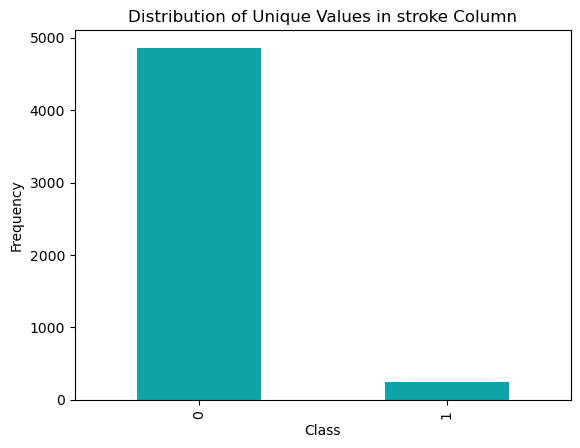

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [7]:
# Does the patient have a history of stroke? 
value_counts = df_stroke['stroke'].value_counts()

# Plotting the bar graph
value_counts.plot(kind='bar', color='#0FA4A8')
plt.title('Distribution of Unique Values in stroke Column')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

df_stroke['stroke'].value_counts(normalize=True)

Yes, before cleaning the data, the dataset class distribution is at 95.12% - 4.87% - a significantly enough imbalance dataset (see above Figure). 

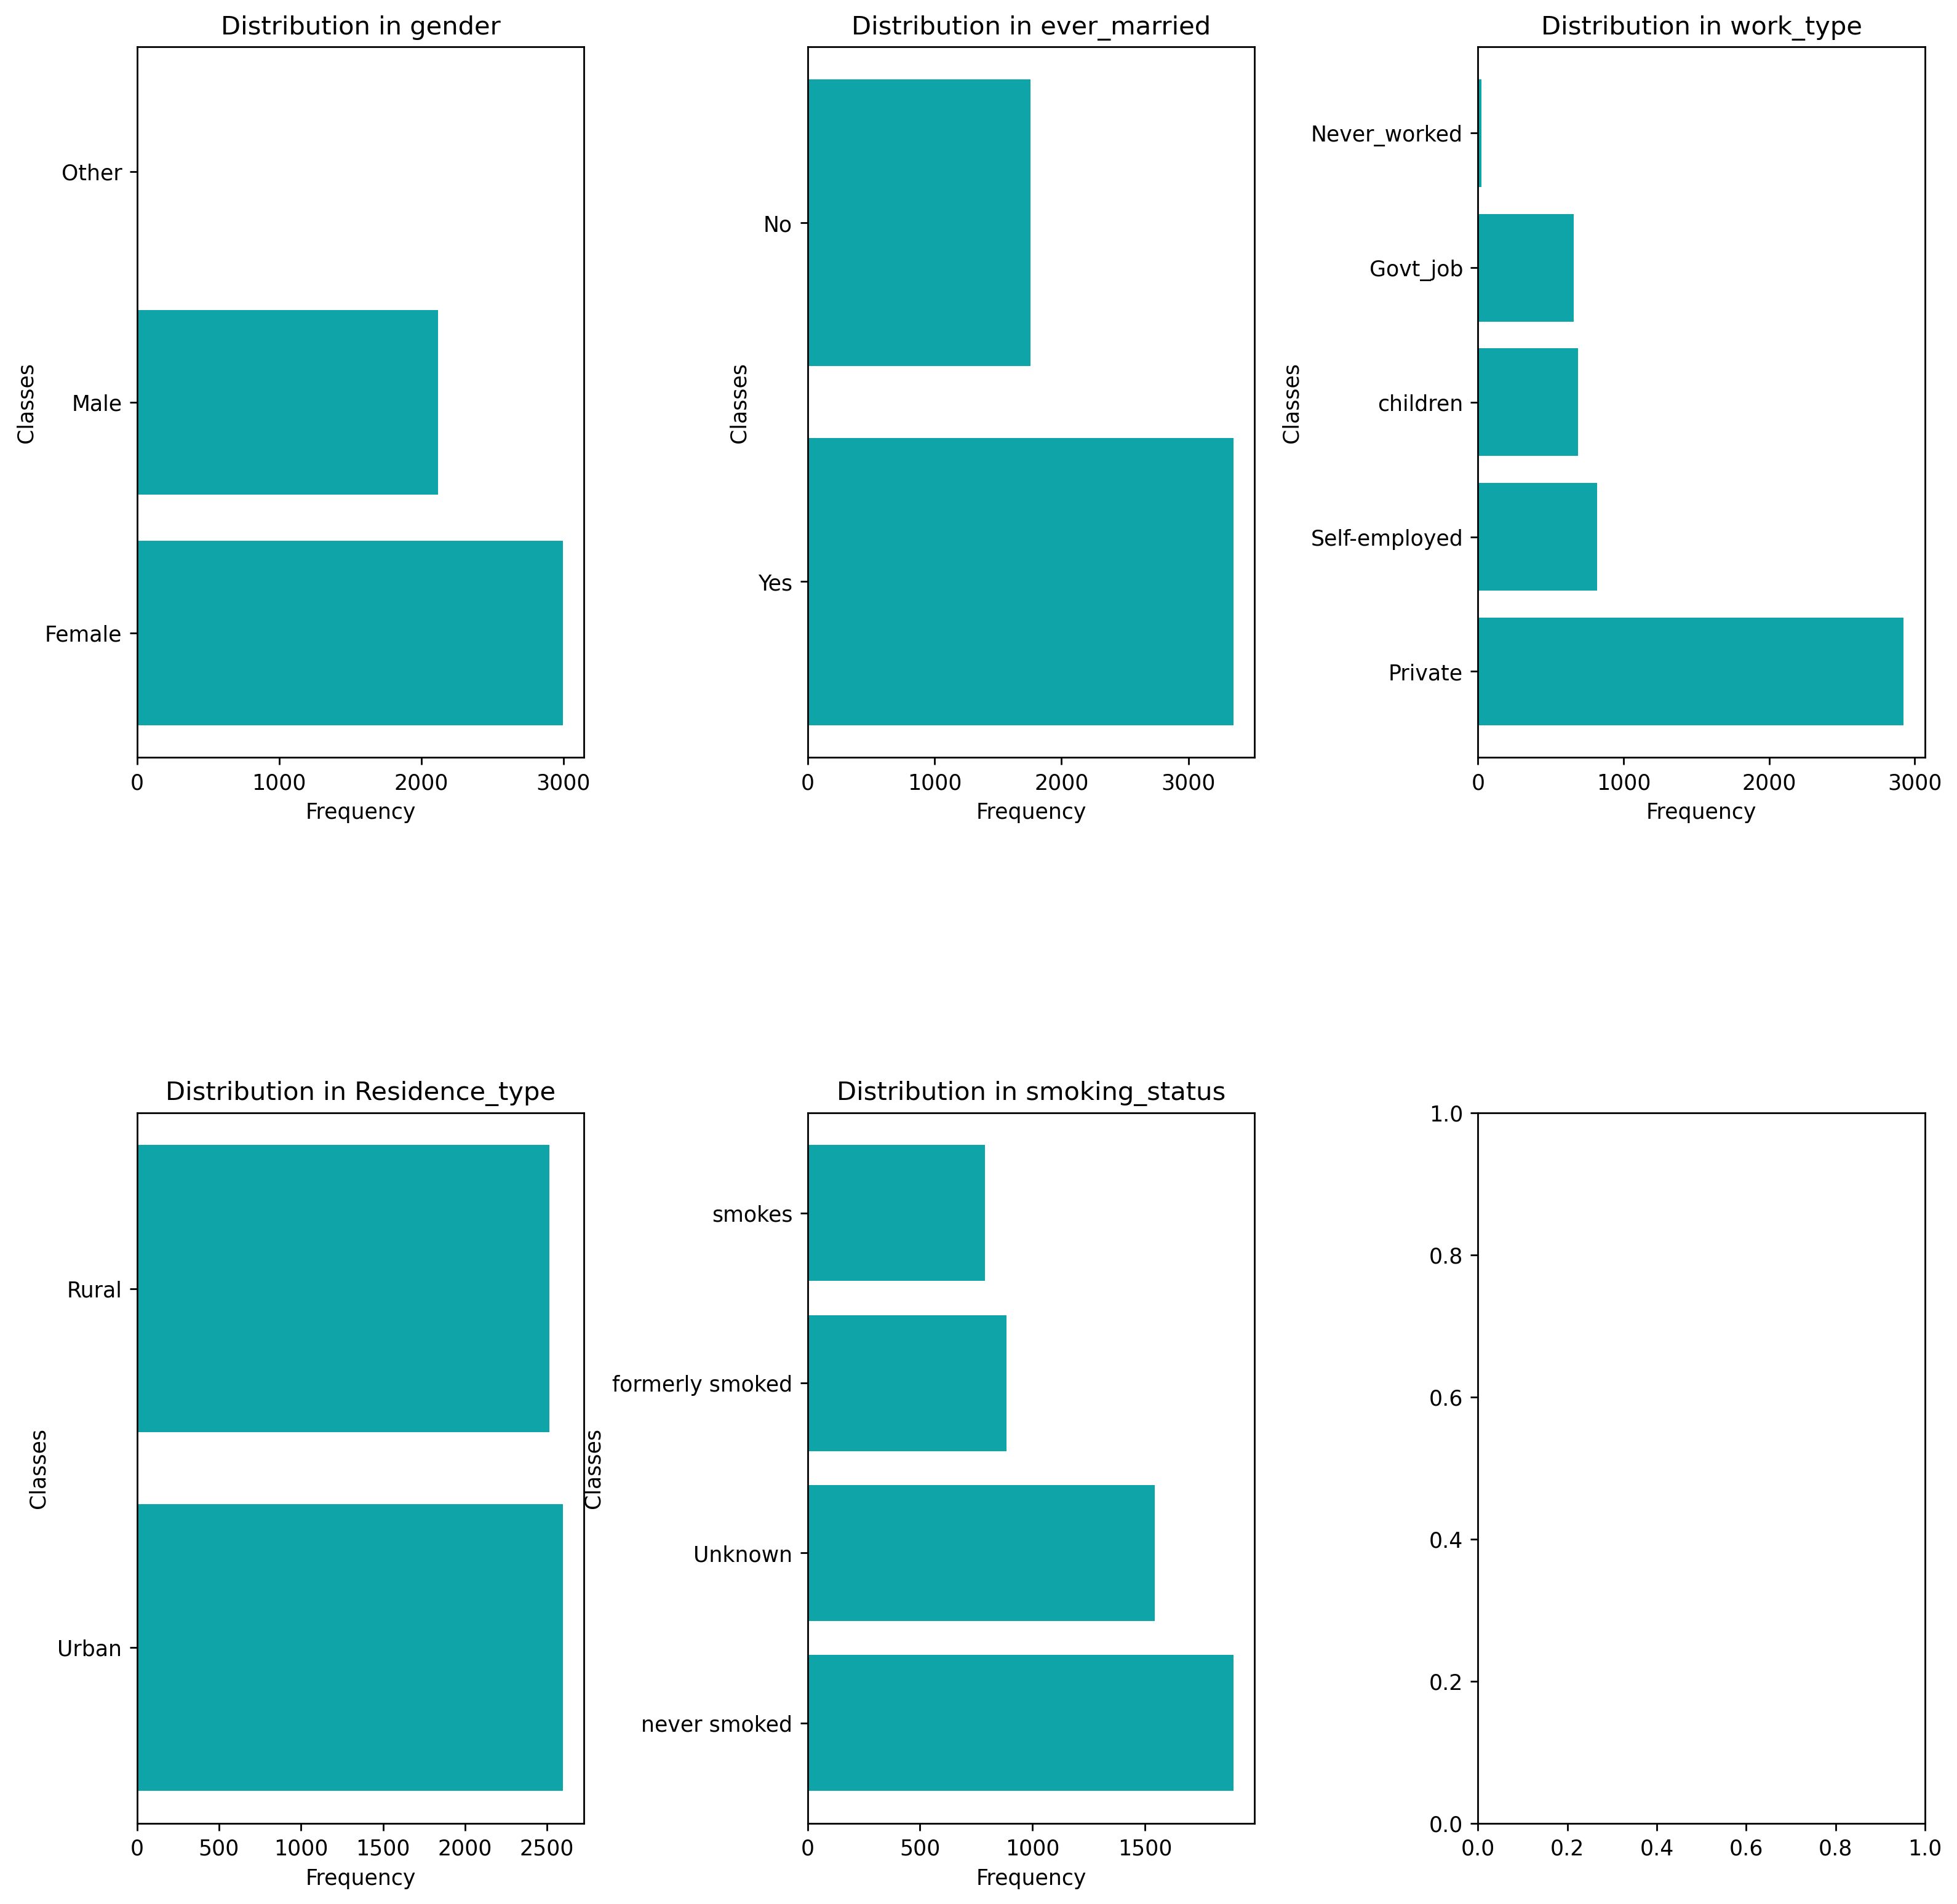

In [8]:
# Distribution of each value for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15), dpi=250)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.flatten()

# Looking for underrepresented categorical values
for i, col in enumerate(df_stroke.select_dtypes(include="O").columns):
    if i < 6:
        value_counts = df_stroke[col].value_counts()
        axes[i].barh(value_counts.index, value_counts.values, color="#0FA4A8")
        axes[i].set_title(f"Distribution in {col}")
        axes[i].set_ylabel("Classes")
        axes[i].set_xlabel("Frequency")
    else:
        break

plt.show()

<center><b>Figure 3</b>. Distribution of each value for each feature.</center> 

From Figure 3, I determined some of the datapoints that were under represented like work_type = Never_worked and gender = Other. I removed this in the next cell. 

## Removal of Nulls, Under-represented values and Unknowns.

In [9]:
# Remove ID
df_stroke = df_stroke.iloc[:,1:]

# For simplicity and time-constraints, drop nulls
df_stroke.dropna(inplace=True)

# Remove under-represented values and 'Unknowns'
df_stroke = df_stroke[df_stroke["smoking_status"] != "Unknown"]

# Under-represented 
df_stroke = df_stroke[df_stroke["gender"] != "Other"]
df_stroke = df_stroke[df_stroke["work_type"] != "Never_worked"]

## Categorical Features 

In [10]:
# Get all categorical columns
cat_cols = df_stroke.select_dtypes(include="object").columns.tolist()
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

## Numerical Features

In [11]:
# Get all categorical columns
num_cols = df_stroke.select_dtypes(include="number").columns.tolist()
num_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

## One-Hot Encoding for Categorical Columns 

In [12]:
# One hot encode Categorical Columns
onehot_enc = OneHotEncoder(sparse=False, drop="first")
onehot_encoded = onehot_enc.fit_transform(df_stroke[cat_cols])
onehot_encoded_df = pd.DataFrame(
    onehot_encoded, columns=onehot_enc.get_feature_names_out(cat_cols)
)

In [13]:
df_stroke_clean = df_stroke.drop(columns=cat_cols)
df_stroke_clean = pd.merge(
    df_stroke_clean.reset_index(drop=True),
    onehot_encoded_df,
    right_index=True,
    left_index=True,
)
df_stroke_clean.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,80.0,0,1,105.92,32.5,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0,0,171.23,34.4,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,79.0,1,0,174.12,24.0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,81.0,0,0,186.21,29.0,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


<center><b>Table 4</b>. Cleaned DataFrame ready for processing.</center> 

In [14]:
# Distribution after Basic EDA and Data Cleaning 
distribution = df_stroke_clean['stroke'].value_counts(normalize=True)
distribution*100

stroke
0    94.722955
1     5.277045
Name: proportion, dtype: float64

Population per class:      0
1   180
0  3231
Proportion Chance Criterion: 90.00%
1.25 * Proportion Chance Criterion: 112.50%


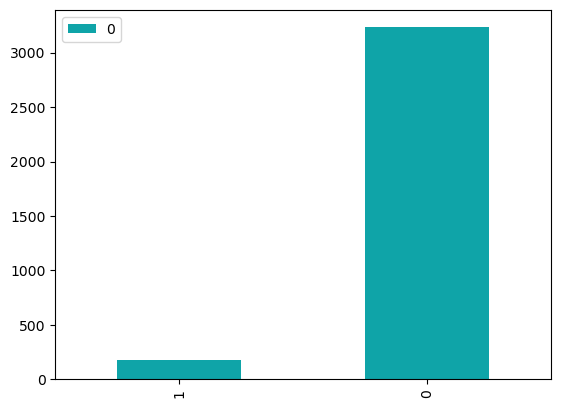

In [15]:
counts = Counter(df_stroke_clean["stroke"])
df_state = pd.DataFrame.from_dict(counts, orient="index")
df_state.plot(kind="bar", color="#0FA4A8")

num = (df_state[0] / df_state[0].sum()) ** 2

print("Population per class:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100 * num.sum()))
print(
    "1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25 * 100 * num.sum()))

<center><b>Figure 4</b>. Class Distribution of Target Variable after Data Cleaning. </center> 

Even after thorough cleaning, this is a very unbalanced dataset with the distribution seen above in Figure 4. Only 5% of the patients had a history of stroke. 

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">EXPLORATORY DATA ANALYSIS</h1></center>
</div> 

Before loading the processed data in the pipeline, it is always best to do some quick exploration about the data to interpret more insights. 

In [16]:
# Copying for EDA 
df_stroke_eda = df_stroke.copy()
df_stroke_eda.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


<center><b>Table 5</b>. Copy DataFrame solely for EDA</center>

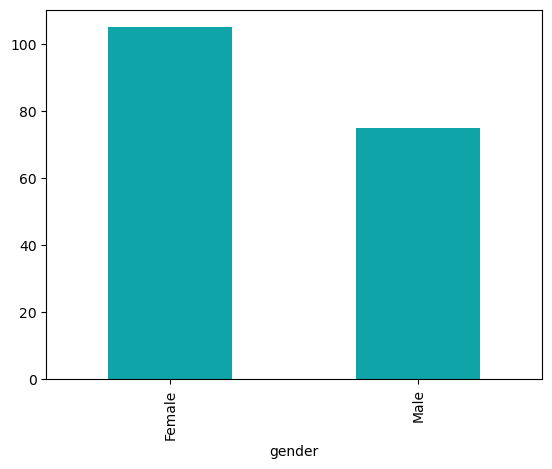

In [17]:
# Distribution of Minority Class in terms of Gender
df_stroke_eda[df_stroke_eda["stroke"] == 1]["gender"].value_counts().plot(
    kind="bar", color="#0FA4A8"
);

<center><b>Figure 5</b>. Class Distribution by Gender </center>
The above Figure 5 illustrates that within this dataset, the prevalence of stroke is higher among female patients compared to male patients. It is noteworthy that, as depicted in the plots of Figure 3, females outnumber males across both classes, which accounts for the observed pattern in the minority class as well.

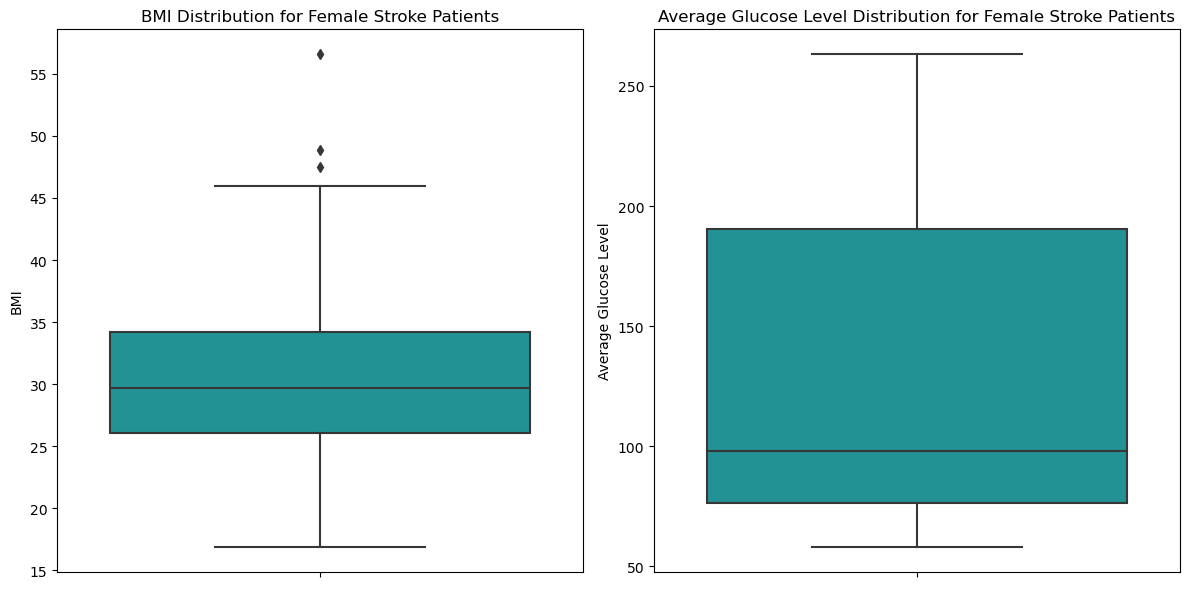

In [18]:
# Box Plot of Female Minority Class in terms of bmi and avg_glucose_level
female_stroke_patients = df_stroke_eda[
    (df_stroke_eda["stroke"] == 1) & (df_stroke_eda["gender"] == "Female")
]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot BMI boxplot
sns.boxplot(ax=axes[0], y=female_stroke_patients["bmi"], color="#0FA4A8")
axes[0].set_title("BMI Distribution for Female Stroke Patients")
axes[0].set_ylabel("BMI")

# Plot Average Glucose Level boxplot
sns.boxplot(
    ax=axes[1], y=female_stroke_patients["avg_glucose_level"], color="#0FA4A8")
axes[1].set_title(
    "Average Glucose Level Distribution for Female Stroke Patients")
axes[1].set_ylabel("Average Glucose Level")

# Display the plot
plt.tight_layout()
plt.show()

<center><b>Figure 6</b>. Box Plot of BMI and Average Glucose Level values of Female Stroke Patients</center>
Above, Figure 6 reveals the presence of outliers among the BMI values for female stroke patients. Additionally, the interquartile range (IQR) for the average glucose level is notably wide, indicating that half of the dataset's values fall within this span.

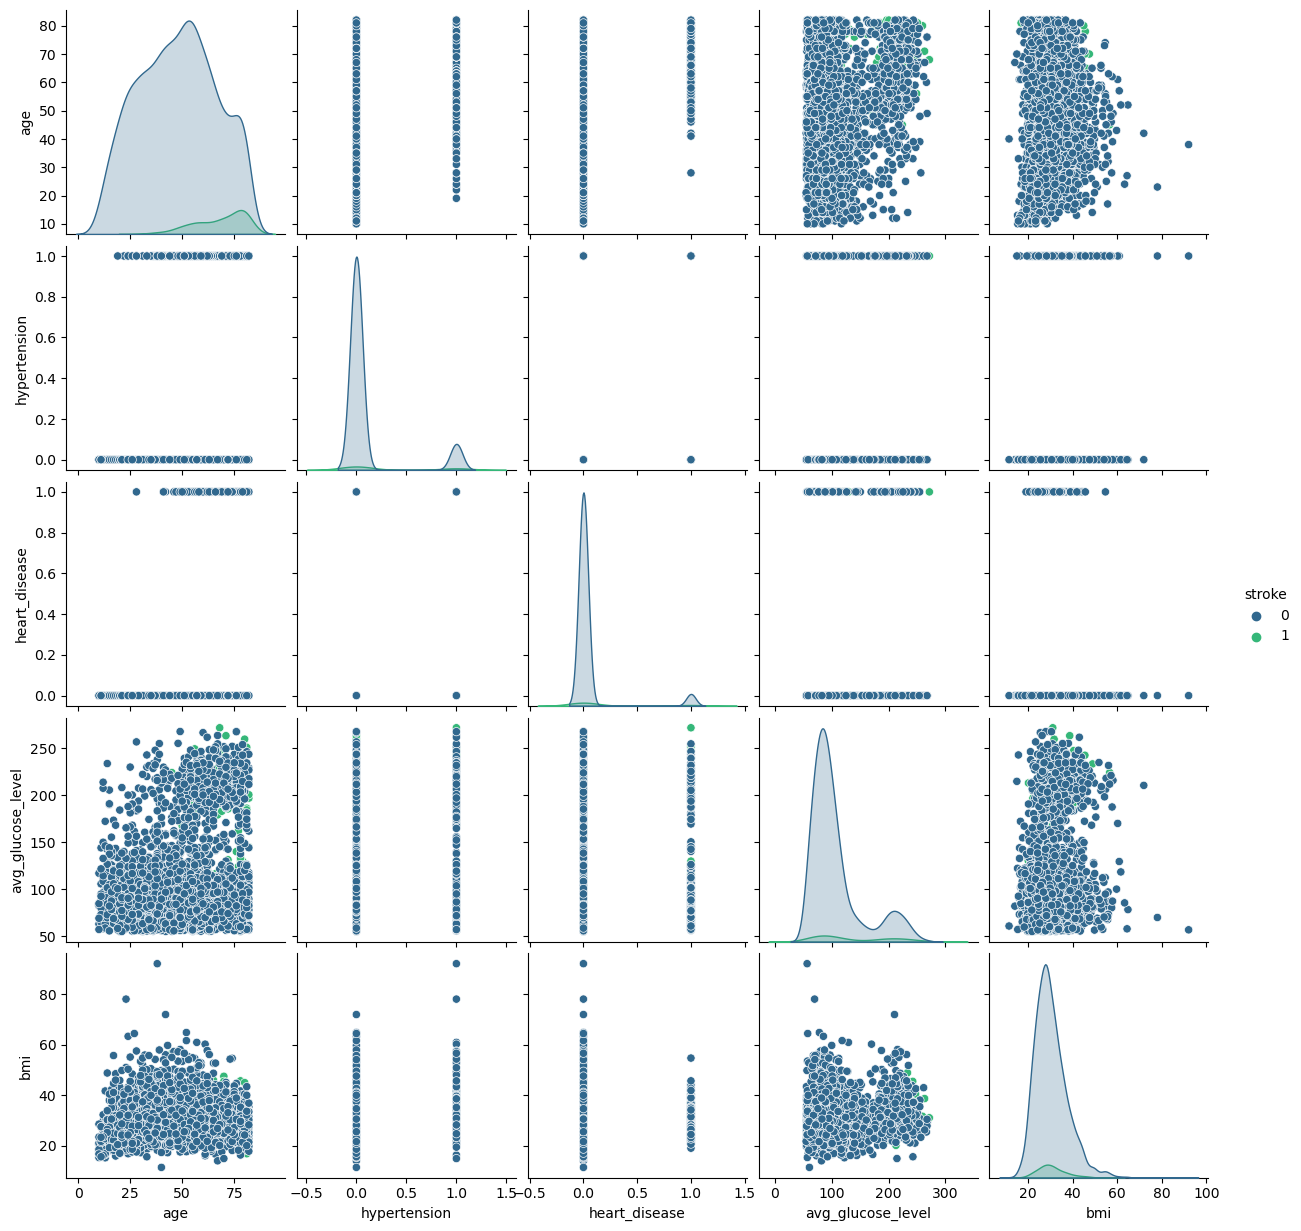

In [19]:
# Scatterplot
sns.pairplot(
    df_stroke[num_cols],
    hue="stroke",
    diag_kind="kde",
    palette='viridis'
);

<center><b>Figure 7</b>. Pairplot of numerical features of Stroke Dataset.</center>
There's a visible cluster of stroke instances at higher levels of average glucose and across a range of BMI values. The scatter of green dots among the higher glucose levels suggests that higher glucose may be a risk factor for stroke. There's also a spread of BMI values for stroke patients, with some outliers visible.

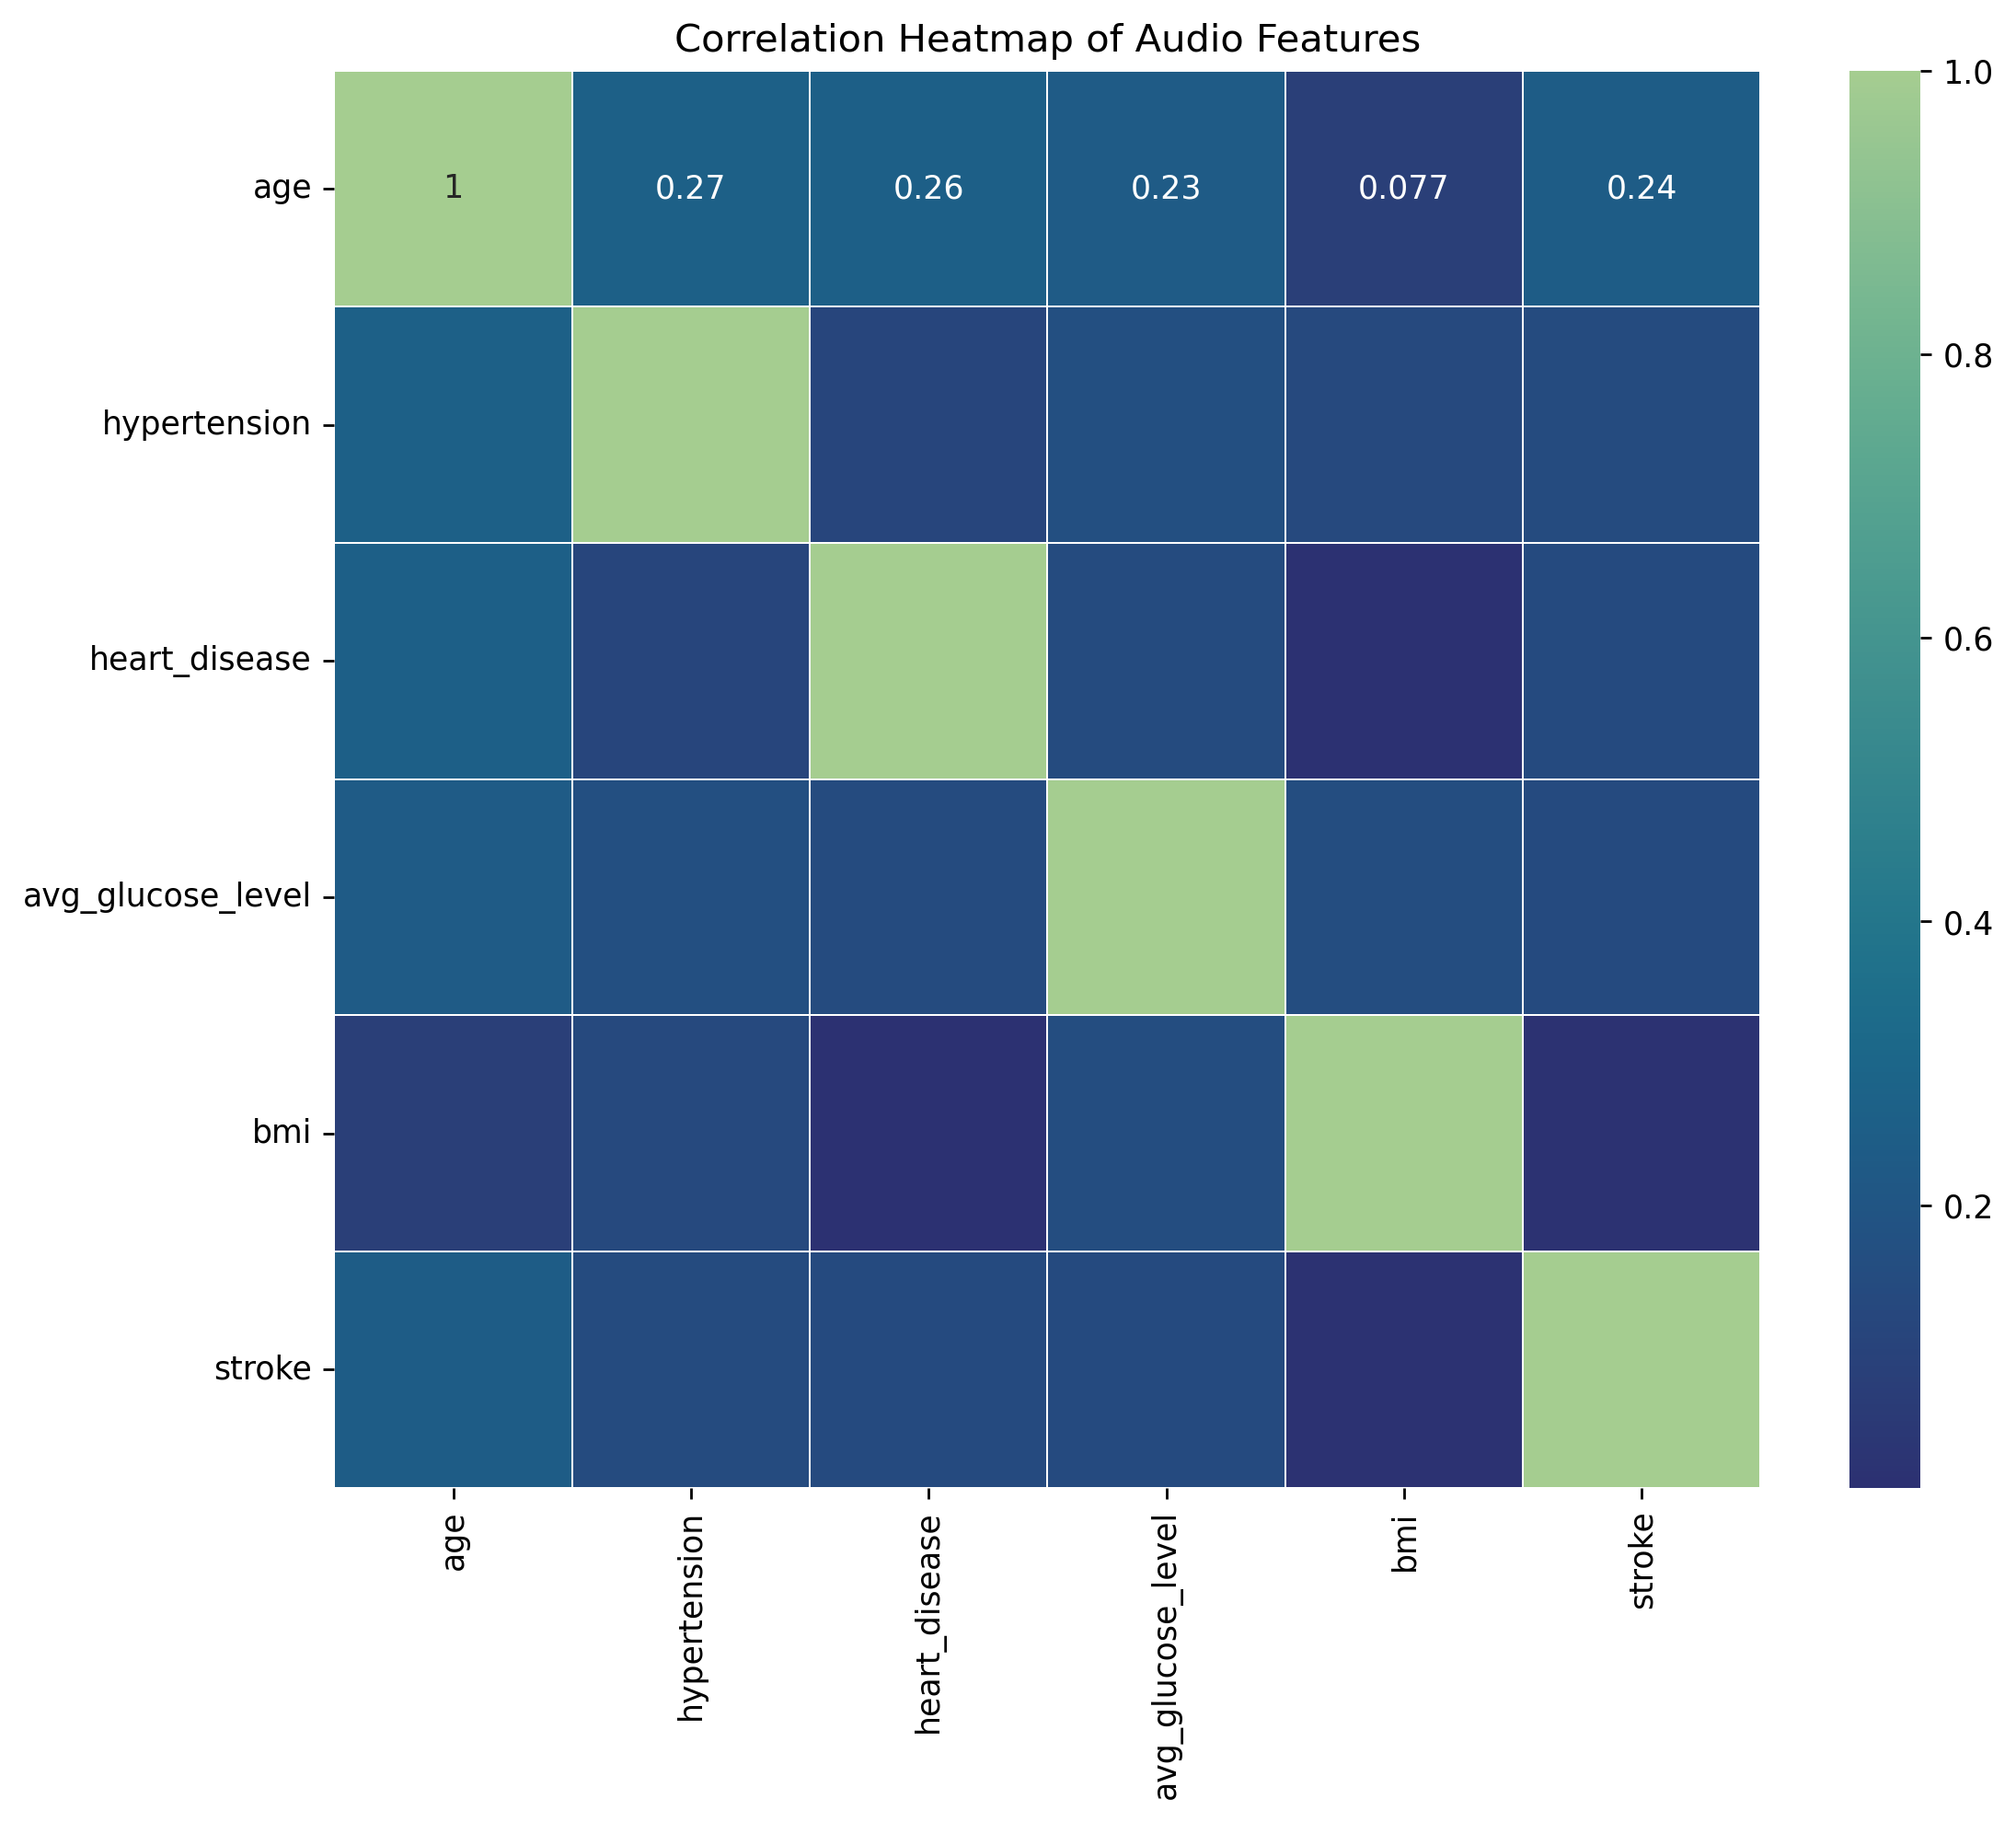

In [20]:
# Correlation Plot 

correlation_matrix = df_stroke[num_cols].corr()
plt.figure(figsize=(10, 8), dpi=250)
sns.heatmap(correlation_matrix, cmap="crest_r", linewidths=0.5, annot=True)
plt.title("Correlation Heatmap of Audio Features")
plt.show()

<center><b>Figure 8</b>. Correlation Plot of numerical features of Stroke Dataset.</center>
The colors correspond to the strength of the correlation, with greener colors indicating a stronger positive correlation and bluer colors representing a weaker correlation or negative correlation (not visible in the provided section). It is important to note that correlation does not imply causation, and these relationships merely suggest associations, not direct cause-and-effect links. Overall, the features don't show that much correlation to each other with coefficients not breaching 0.27. 

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">MACHINE LEARNING PIPELINE</h1></center>
</div> 

<div style="background-color: #eff1f3; padding: 10px 0;">
    <center><h2 style="color: #223843; font-weight:bold">Without Resampling</h2></center>
</div> 

---

### Predictor and Target Variable

In [21]:
# Assigning X and y 
data = df_stroke_clean.copy()
X = data.drop('stroke', axis=1)
y = data['stroke']

### Train-Validation-Test Split

In [22]:
test_size = 0.20
seed=143
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(
    X, y, test_size=test_size, 
    stratify=y,
    random_state=seed)

### Parameters for the search using GridSearchCV

In [23]:
C_range = [1.0e-05, 1.0e-03, 1.0e-01, 1.0e01, 1.0e03, 1.0e05]
alpha_range = [1.0e-05, 1.0e-03, 1.0e-01, 1.0e01, 1.0e03, 1.0e05]
max_depth_range = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
learning_rate_range = [0.1, 0.5, 1.0]
n_neighbor_range = [5, 6, 7, 8, 9, 10, 11]
penalty = ['l1', 'l2']

### Usage of Scalers, Pipeline and Parameter Grid 

In [24]:
steps = [("scaler", StandardScaler()), ("clf", None)]
pipe = Pipeline(steps)
param_grid= [
    {
        "clf": [LinearSVC()],
        "clf__C": C_range,
        "clf__dual": ['auto'],
    },
    {
        "clf": [KNeighborsClassifier()],
        "clf__n_neighbors": n_neighbor_range,
    },
    {
        "clf": [RandomForestClassifier()],
        "clf__max_depth": max_depth_range,
    },
    {
        "clf": [GradientBoostingClassifier()],
        "clf__max_depth": max_depth_range,
        "clf__learning_rate": learning_rate_range,
    },
    {
        "clf": [LogisticRegression()],
        "clf__penalty": penalty,
        "clf__C": C_range,
        "clf__solver": ["liblinear"],
    },
]

### Determining the Right Scoring Metric
The F1 score is utilized for its capability to provide the harmonic mean between precision and recall, offering a balanced measure that considers both false positives and false negatives. In the context of stroke prediction, missing an actual stroke case could be more dangerous than falsely predicting a stroke, so the F1 score is often a reasonable choice unless there's a specific reason to prioritize precision or recall. The F1_weighted score adjusts for class imbalance by weighting the F1 score of each class according to its presence in the dataset.

In [25]:
cv = 5
scoring = 'f1_weighted'
grid_search = GridSearchCV(pipe, param_grid, return_train_score=True, cv=cv,
                           verbose=2, n_jobs=-1, scoring=scoring)
grid_search.fit(X_trainval, y_trainval)

Fitting 5 folds for each of 69 candidates, totalling 345 fits
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.1s
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.0s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.1s
[CV] END ......clf=LinearSVC(), clf__C=0.001, clf__dual=auto; total time=   0.0s
[CV] END ........clf=LinearSVC(), clf__C=0.1, clf__dual=auto; total time=   0.0s
[CV] END .......clf=LinearSVC(), clf__C=10.0, clf__dual=auto; total time=   0.1s
[CV] END .....clf=LinearSVC(), clf__C=1000.0, clf__dual=auto; total time=   0.1s
[CV] END .....clf=LinearSVC(), clf__C=1000.0, clf__dual=auto; total time=   0.0s
[CV] END ...clf=LinearSVC(), clf__C=100000.0, clf__dual=auto; total time=   0.1s
[CV] END .....clf=KNeighborsClassifier(), clf__n_neighbors=5; total time=   0.3s
[CV] END .....clf=KNeighborsClassifier(), clf__n_neighbors=5; total time=   0.2s
[CV] END .....clf=KNeighborsClassifier(), clf__

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', None)]),
             n_jobs=-1,
             param_grid=[{'clf': [LinearSVC()],
                          'clf__C': [1e-05, 0.001, 0.1, 10.0, 1000.0, 100000.0],
                          'clf__dual': ['auto']},
                         {'clf': [KNeighborsClassifier()],
                          'clf__n_neighbors': [5, 6, 7, 8, 9, 10, 11]},
                         {'clf': [RandomForestClassifier()],
                          'clf__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                             15]},
                         {'clf': [GradientBoostingClassifier()],
                          'clf__learning_rate': [0.1, 0.5, 1.0],
                          'clf__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                             15]},
                         {'clf': [LogisticRegression()],
                          'clf__C': [1e-05, 0.001, 0.1, 10.0, 1000.0, 100000.0],
                          'clf__penalty': ['l1', 'l2'],
                          'clf__solver': ['liblinear']}],
             return_train_score=True, scoring='f1_weighted', verbose=2)

### Determining the best model and its parameters and its score

In [26]:
print(f"The best model is: {grid_search.best_params_}")
print(f"with an accuracy score of: {grid_search.best_score_}")

The best model is: {'clf': RandomForestClassifier(), 'clf__max_depth': 13}
with an accuracy score of: 0.9234691371287249


The optimal model for this heavily imbalanced dataset is a Random Forest Classifier with parameter max depth of 13.   

However, the accuracy is 92.35%. Despite the Random Forest Classifier achieving a high accuracy of 92.35%, this metric may not reflect the model's true performance due to the 95-5 class imbalance. The high accuracy could be largely due to the model's ability to predict the majority class while failing to accurately identify the much smaller minority class, which is often the more important measure in imbalanced datasets. Additional metrics, such as the F1 score, precision, and recall for the minority class, should be considered for a comprehensive evaluation.

In [27]:
cv_results = pd.DataFrame(grid_search.__dict__['cv_results_'])
cv_results.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__C,param_clf__dual,param_clf__n_neighbors,param_clf__max_depth,param_clf__learning_rate,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
21,1.027363,0.083125,0.065980,0.023267,RandomForestClassifier(),NaN,NaN,NaN,13,NaN,...,0.923469,0.020026,1,0.992921,0.995308,0.995790,0.994842,0.990946,0.993961,0.001795
7,0.034464,0.022096,0.203685,0.011334,KNeighborsClassifier(),NaN,NaN,6,NaN,NaN,...,0.922952,0.021168,2,0.916234,0.930401,0.928374,0.923846,0.921547,0.924080,0.005029
10,0.041274,0.023257,0.213040,0.002169,KNeighborsClassifier(),NaN,NaN,9,NaN,NaN,...,0.922560,0.019513,3,0.916577,0.930647,0.928129,0.923595,0.920728,0.923935,0.005044
8,0.023302,0.018935,0.215050,0.013967,KNeighborsClassifier(),NaN,NaN,7,NaN,NaN,...,0.922535,0.021013,4,0.917635,0.933609,0.928955,0.925438,0.922602,0.925648,0.005438
18,0.986900,0.098716,0.058290,0.023275,RandomForestClassifier(),NaN,NaN,NaN,10,NaN,...,0.922384,0.021197,5,0.971441,0.975475,0.975586,0.975856,0.975997,0.974871,0.001725


<center><b>Table 6</b>. Results of the CV using GridSearchCV</center>

In [28]:
cv_results['param_clf'] = cv_results['param_clf'].astype(str)
grouped_results = cv_results[['mean_train_score', 'mean_test_score', 'param_clf']].groupby('param_clf').max()[['mean_train_score', 'mean_test_score']]
grouped_results

,mean_train_score,mean_test_score
param_clf,,
GradientBoostingClassifier(),1.000000,0.921428
KNeighborsClassifier(),0.929388,0.922952
LinearSVC(),0.921990,0.921599
LogisticRegression(),0.923465,0.921932
RandomForestClassifier(),0.999448,0.923469


<center><b>Table 7</b>. Performance of other Models</center>
It is also apparent in other models with the Linear models having a lower train score. Ensemble models are actually overfitting. 

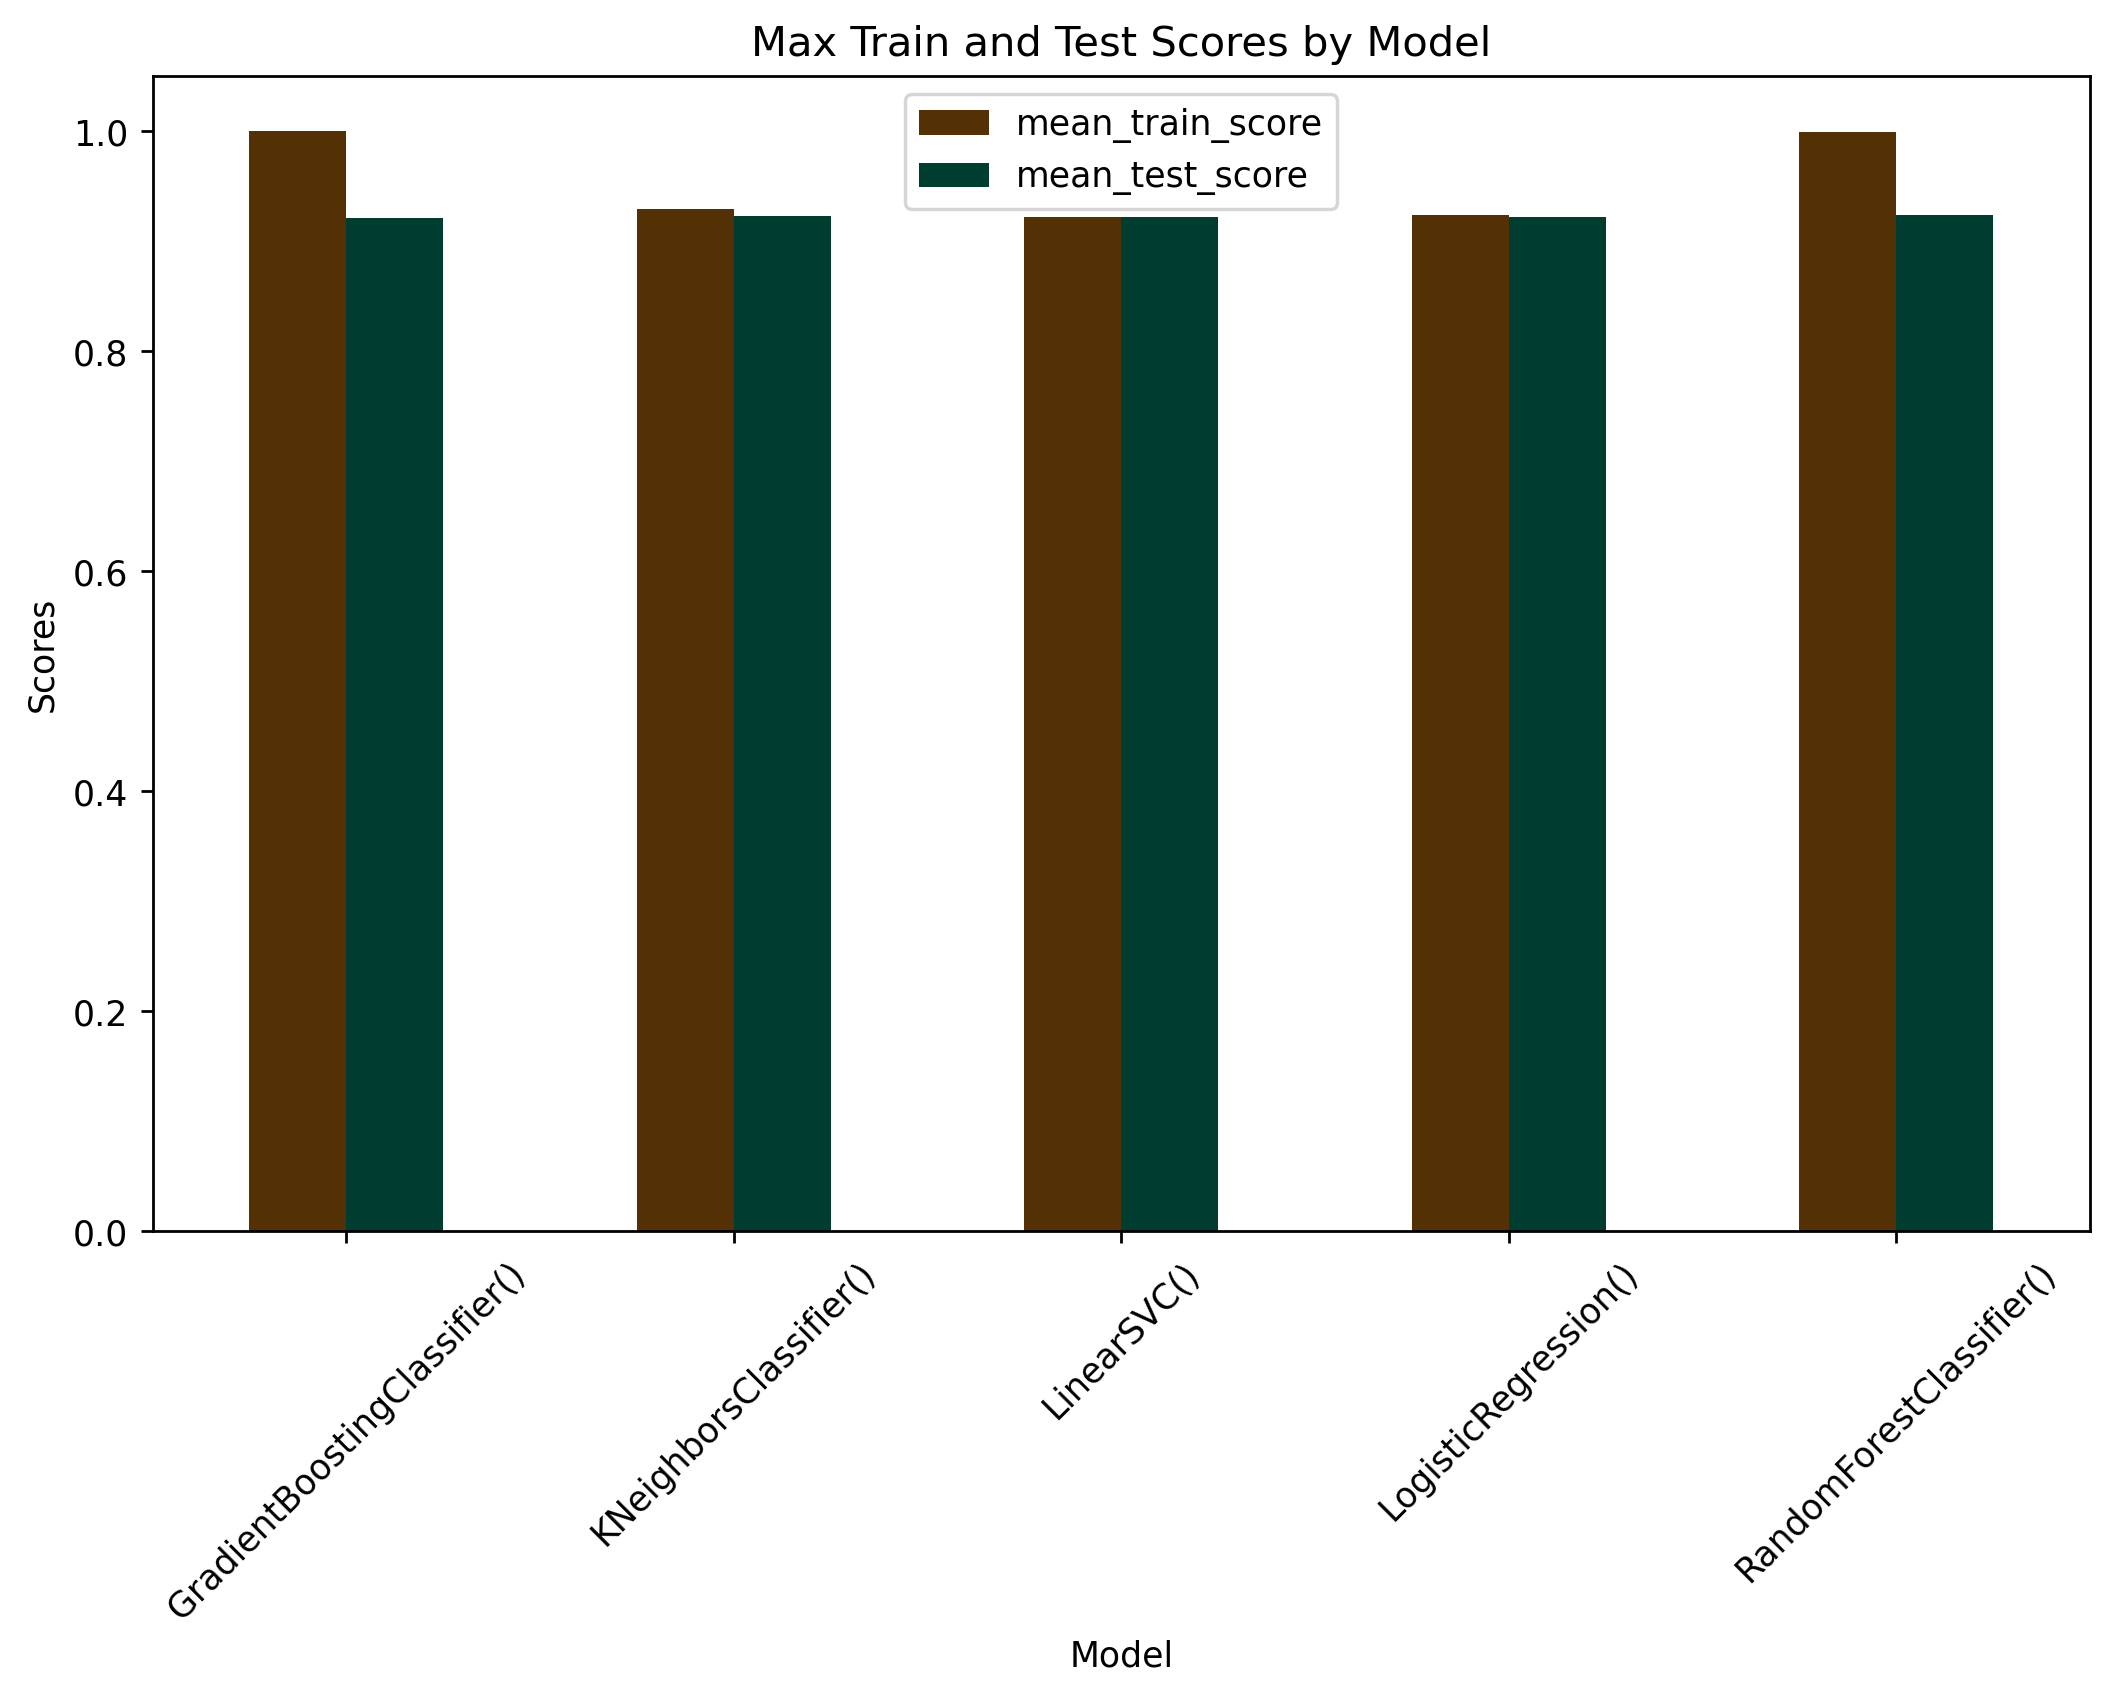

In [29]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=250)

grouped_results.plot(kind='bar', ax=ax, colormap='BrBG')
ax.set_title('Max Train and Test Scores by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

<center><b>Figure 8</b>. Performance of other models without resampling</center>   
From Figure 8, the models are just trying to predict everything as the majority group and does not have the ability to predict from the minority group. 

### Refitting of the best model to the Train-Validation 

In [30]:
best_model = grid_search.best_estimator_.fit(X_trainval, y_trainval)
best_model_score = best_model.score(X_holdout, y_holdout)

In [31]:
print(best_model_score)

0.9443631039531479


In [32]:
# Confusion Matrix on Holdout
y_pred = grid_search.best_estimator_.predict(X_holdout)
print(confusion_matrix(y_holdout, y_pred))

[[645   2]
 [ 36   0]]


In [33]:
# Classification Report on Holdout
y_pred = grid_search.best_estimator_.predict(X_holdout)
print(classification_report(y_holdout, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       647
           1       0.00      0.00      0.00        36

    accuracy                           0.94       683
   macro avg       0.47      0.50      0.49       683
weighted avg       0.90      0.94      0.92       683



### Interpretation - without resampling
The model's high accuracy of 94.58% on the holdout set is predominantly driven by its success in predicting the majority class (class 0), as evidenced by the confusion matrix showing 646 true positives and only 1 false positive. However, it completely fails to identify any instances of the minority class (class 1), with 36 false negatives and no true positives. This failure is reflected in the precision and recall for class 1 being zero, leading to an F1-score of zero, which indicates the model's inability to correctly classify the minority class. 

<div style="background-color: #eff1f3; padding: 10px 0;">
    <center><h2 style="color: #223843; font-weight:bold">With Resampling - SMOTE</h2></center>
</div> 

---

### Predictor and Target Variable

In [34]:
data_smote = df_stroke.copy()
X = data_smote.drop('stroke', axis=1)
y = data_smote['stroke']

### Train-Validation-Test Split

In [35]:
test_size = 0.20
seed=143
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(
    X, y, test_size=test_size, 
    stratify=y,
    random_state=seed)

### Using ColumnTransformer to include Preprocessing in the Pipeline and SMOTENC

In [36]:
# Get index of cat_cols
cat_ind = [df_stroke.columns.get_loc(col) for col in cat_cols]

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols[:-1]),
        ("cat", OneHotEncoder(drop='if_binary'), cat_cols)
    ])

# Define steps including the preprocessor and SMOTENC
steps_smote = [
    ("preprocessor", preprocessor),
    ("smotenc", SMOTENC(categorical_features=cat_ind, random_state=42)),
    ("clf", None)
]

### Using ImbPipeline 

In [37]:
pipe_smote = ImbPipeline(steps_smote)
param_grid_smote = [
    {
        "clf": [LinearSVC()],
        "clf__C": C_range,
        "clf__dual":['auto']
    },
    {
        "clf": [KNeighborsClassifier()],
        "clf__n_neighbors": n_neighbor_range,
    },
    {
        "clf": [RandomForestClassifier()],
        "clf__max_depth": max_depth_range,
    },
    {
        "clf": [GradientBoostingClassifier()],
        "clf__max_depth": max_depth_range,
        "clf__learning_rate": learning_rate_range,
    },
    {
        "clf": [LogisticRegression()],
        "clf__penalty": penalty,
        "clf__C": C_range,
        "clf__solver": ["liblinear"],
    },
]

### Determining the Right Scoring Metric

In [38]:
cv = 5
scoring = "f1"
grid_search_smote = GridSearchCV(
    pipe_smote,
    param_grid_smote,
    return_train_score=True,
    cv=cv,
    verbose=2,
    n_jobs=-1,
    scoring=scoring,
)
grid_search_smote.fit(X_trainval, y_trainval)

Fitting 5 folds for each of 69 candidates, totalling 345 fits
[CV] END ......clf=LinearSVC(), clf__C=1e-05, clf__dual=auto; total time=   0.1s
[CV] END ........clf=LinearSVC(), clf__C=0.1, clf__dual=auto; total time=   0.0s
[CV] END ........clf=LinearSVC(), clf__C=0.1, clf__dual=auto; total time=   0.0s
[CV] END .......clf=LinearSVC(), clf__C=10.0, clf__dual=auto; total time=   0.1s
[CV] END .......clf=LinearSVC(), clf__C=10.0, clf__dual=auto; total time=   0.1s
[CV] END ...clf=LinearSVC(), clf__C=100000.0, clf__dual=auto; total time=   0.0s
[CV] END .....clf=KNeighborsClassifier(), clf__n_neighbors=5; total time=   0.3s
[CV] END .....clf=KNeighborsClassifier(), clf__n_neighbors=6; total time=   0.2s
[CV] END .....clf=KNeighborsClassifier(), clf__n_neighbors=7; total time=   0.2s
[CV] END .....clf=KNeighborsClassifier(), clf__n_neighbors=7; total time=   0.3s
[CV] END .....clf=KNeighborsClassifier(), clf__n_neighbors=8; total time=   0.2s
[CV] END .....clf=KNeighborsClassifier(), clf__

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'avg_glucose_level',
                                                                          'bmi']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['gender',
                                                                          'ever_married',
                                                                          'work_type',
                                                                          'Residence_type',
                                                                          'smoking_status'])])),
                                       ('smotenc',
                                        SMOTENC(categorical_features=[0, 4, 5,
                                                                      6, 9],
                                                r...
                          'clf__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                             15]},
                         {'clf': [GradientBoostingClassifier()],
                          'clf__learning_rate': [0.1, 0.5, 1.0],
                          'clf__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                             15]},
                         {'clf': [LogisticRegression()],
                          'clf__C': [1e-05, 0.001, 0.1, 10.0, 1000.0, 100000.0],
                          'clf__penalty': ['l1', 'l2'],
                          'clf__solver': ['liblinear']}],
             return_train_score=True, scoring='f1', verbose=2)

In [39]:
print(f"The best model is: {grid_search_smote.best_params_}")
print(f"with an accuracy score of: {grid_search_smote.best_score_}")

The best model is: {'clf': LogisticRegression(), 'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
with an accuracy score of: 0.23113035478120864


It is observable that post-resampling, the model's accuracy didn't necessarily improve. Instead, the resampling process enhanced the model's capability to more effectively predict instances from the minority class.

In [40]:
cv_results_smote = pd.DataFrame(grid_search_smote.__dict__['cv_results_'])
cv_results_smote.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__C,param_clf__dual,param_clf__n_neighbors,param_clf__max_depth,param_clf__learning_rate,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
62,0.971022,0.050955,0.046179,0.025934,LogisticRegression(),0.1,NaN,NaN,NaN,NaN,...,0.231130,0.047165,1,0.248974,0.215385,0.242057,0.258544,0.258065,0.244605,0.015842
61,1.225469,0.217462,0.044427,0.023613,LogisticRegression(),0.1,NaN,NaN,NaN,NaN,...,0.230597,0.053958,2,0.249315,0.218182,0.238532,0.252907,0.258443,0.243476,0.014222
2,0.972569,0.021543,0.024682,0.019481,LinearSVC(),0.1,auto,NaN,NaN,NaN,...,0.225047,0.047490,3,0.250000,0.215989,0.237654,0.256934,0.256334,0.243382,0.015352
1,0.964987,0.029959,0.024624,0.018468,LinearSVC(),0.001,auto,NaN,NaN,NaN,...,0.224923,0.053591,4,0.256145,0.214748,0.226776,0.249657,0.254054,0.240276,0.016514
3,1.068274,0.235707,0.039114,0.029222,LinearSVC(),10.0,auto,NaN,NaN,NaN,...,0.224042,0.045698,5,0.247253,0.213783,0.241113,0.256259,0.254873,0.242656,0.015437


<center><b>Table 8</b>. Results of the CV using GridSearchCV - with resampling</center>

In [41]:
cv_results_smote['param_clf'] = cv_results_smote['param_clf'].astype(str)
grouped_results_smote = cv_results_smote[['mean_train_score', 'mean_test_score', 'param_clf']].groupby('param_clf').max()[['mean_train_score', 'mean_test_score']]
grouped_results_smote

,mean_train_score,mean_test_score
param_clf,,
GradientBoostingClassifier(),1.000000,0.181050
KNeighborsClassifier(),0.397919,0.179755
LinearSVC(),0.243382,0.225047
LogisticRegression(),0.244605,0.231130
RandomForestClassifier(),0.944034,0.219999


<center><b>Table 9</b>. Performance of other Models - with resampling</center>

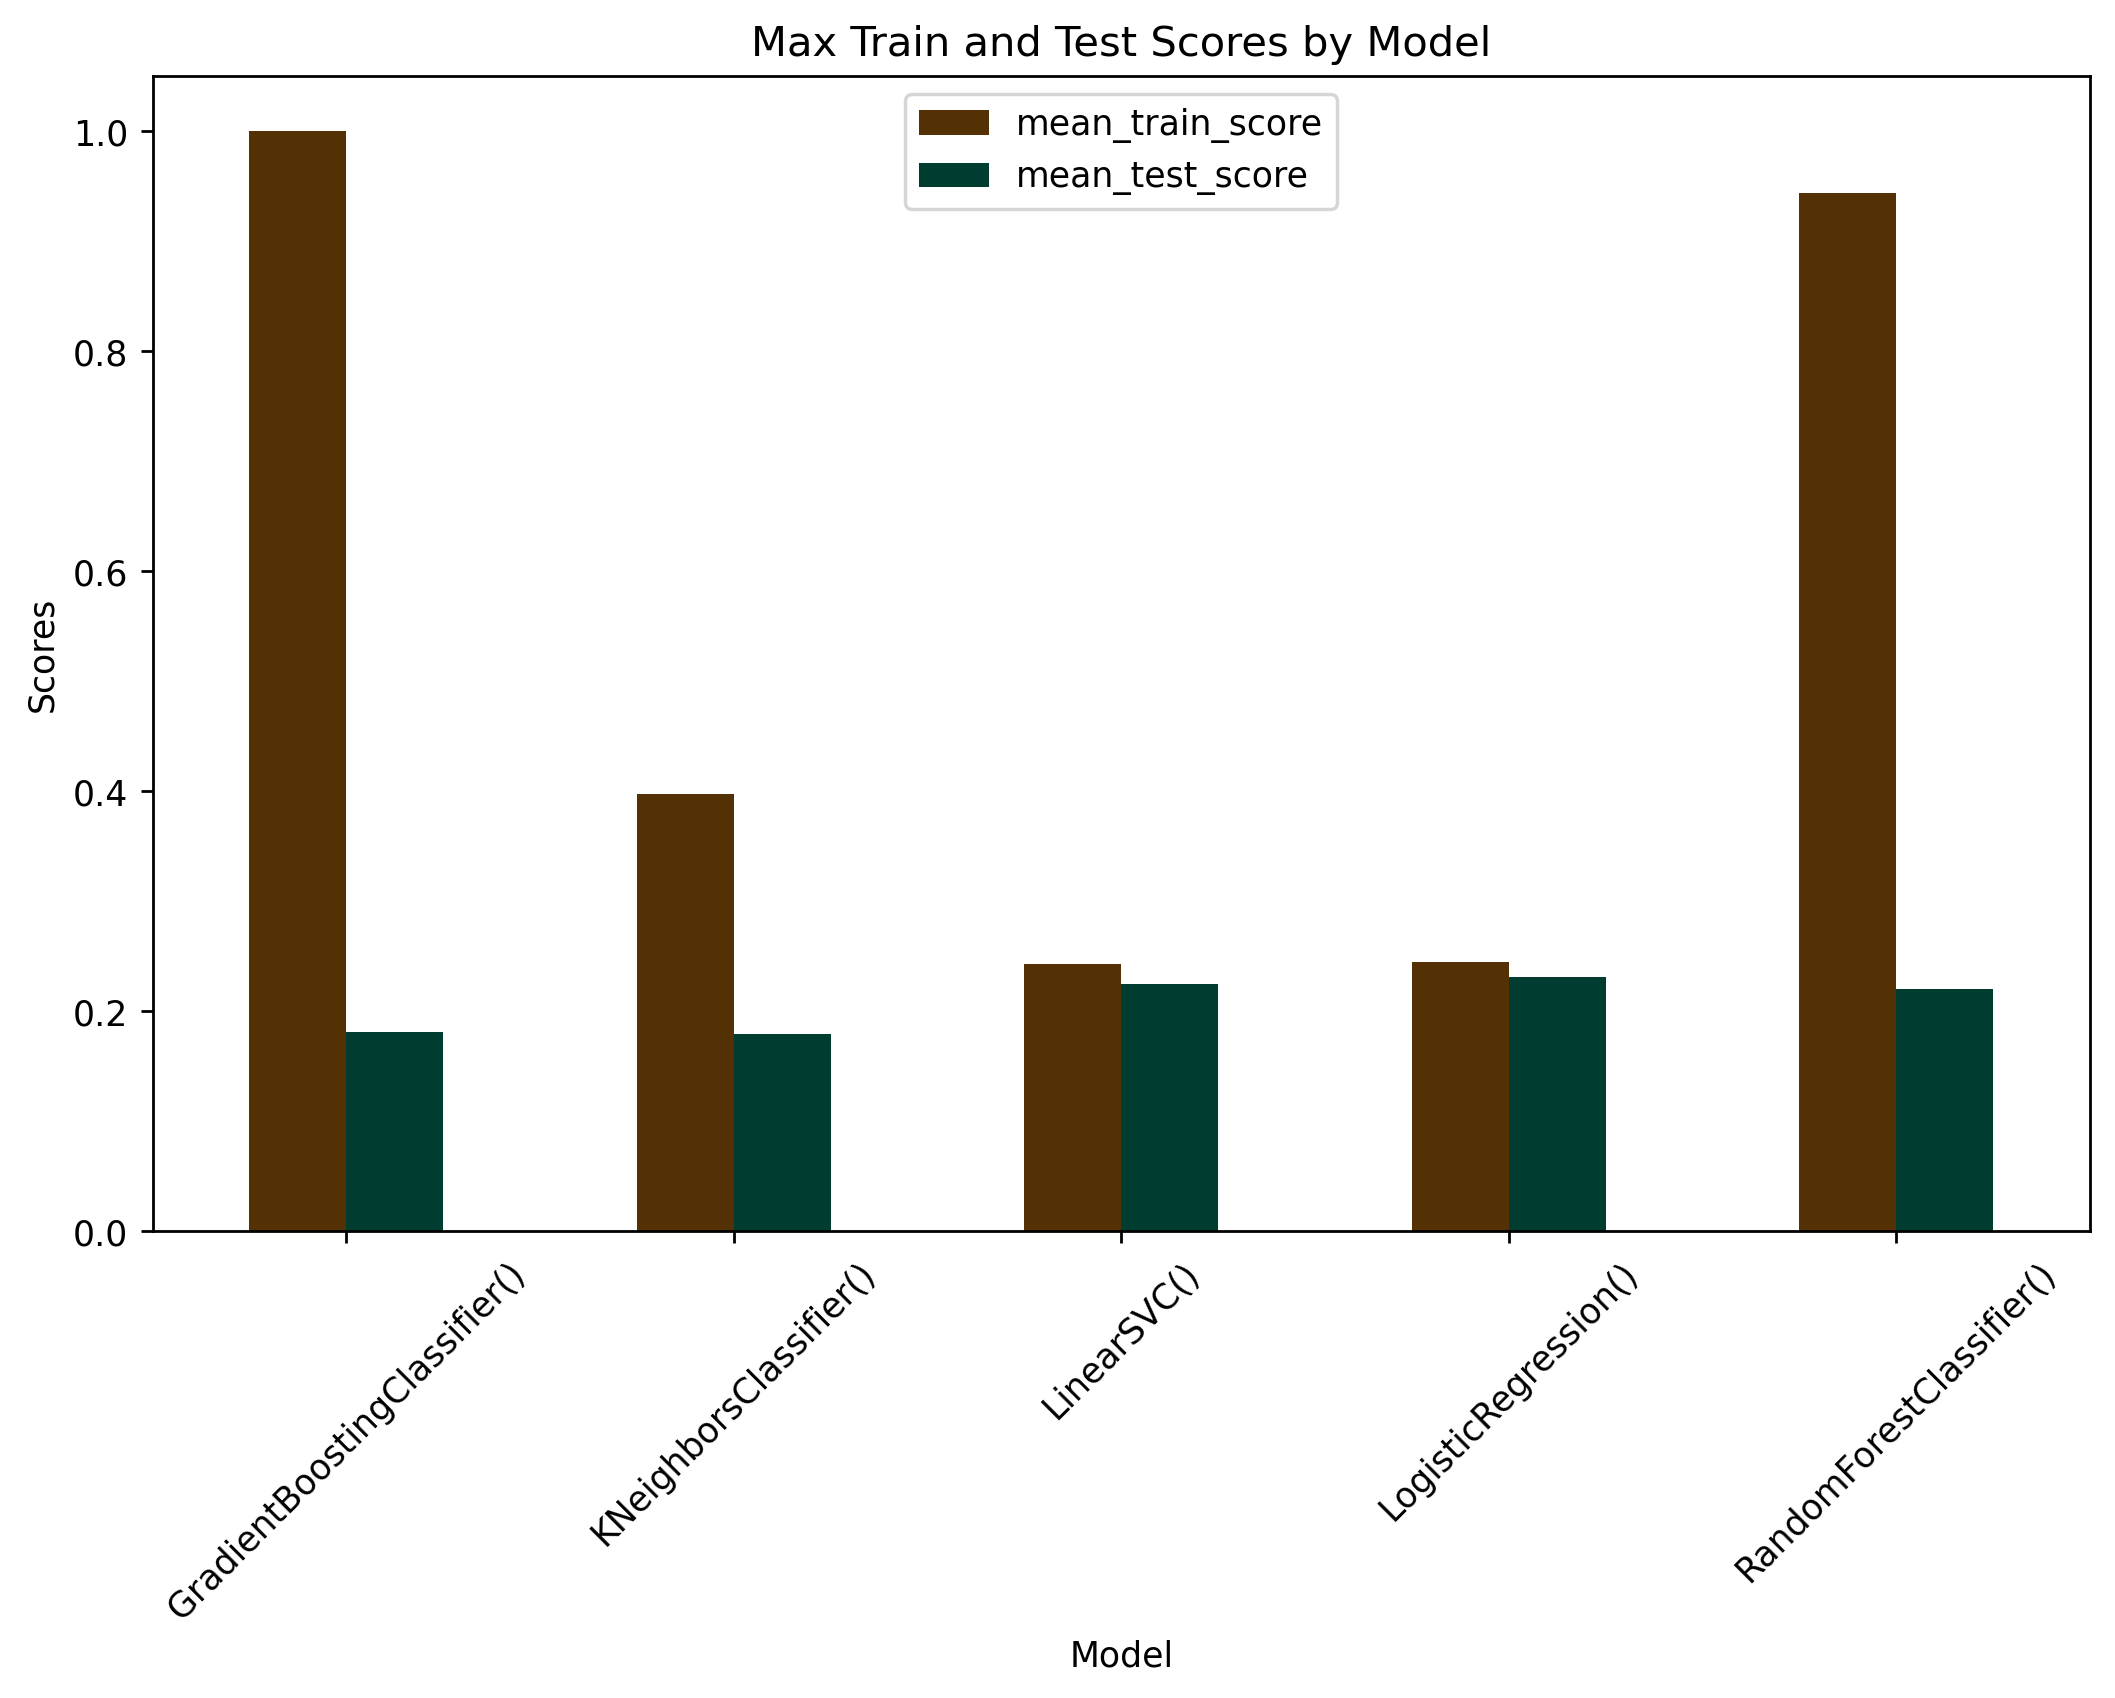

In [42]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
grouped_results_smote.plot(kind='bar', ax=ax, colormap='BrBG')
ax.set_title('Max Train and Test Scores by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

<center><b>Figure 9</b>. Performance of other models with resampling</center>   
Figure 9 demonstrates that while the models have gained the capability to predict the minority class, this improvement has come at the cost of reduced overall accuracy.

### Refitting of the best model to the Train-Validation 

In [43]:
best_model_smote = grid_search_smote.best_estimator_.fit(X_trainval, y_trainval)
best_model_score_smote = best_model_smote.score(X_holdout, y_holdout)

In [44]:
print(best_model_score_smote)

0.7276720351390923


In [45]:
y_pred = best_model_smote.predict(X_holdout)
print (confusion_matrix(y_holdout, y_pred))

[[466 181]
 [  5  31]]


In [46]:
y_pred = best_model_smote.predict(X_holdout)
print(classification_report(y_holdout, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83       647
           1       0.15      0.86      0.25        36

    accuracy                           0.73       683
   macro avg       0.57      0.79      0.54       683
weighted avg       0.94      0.73      0.80       683



### Interpretation - with resampling - SMOTE
The use of SMOTE seems to have improved the model's ability to detect the minority class, as evidenced by the high recall for class 1. However, this has come at the cost of a significant number of false positives, as seen in the low precision for class 1. This indicates that while the model is good at identifying most true positive cases, it also mistakenly classifies a lot of negative cases as positive. Balancing this trade-off between recall and precision is a common challenge in imbalanced datasets, and further tuning may be needed to find an optimal balance.



<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">RESULTS and DISCUSSION</h1></center>
</div> 

Based on the interpreted results above, for stroke data, the cost of a false negative (failing to predict a stroke that actually occurs) can be extremely high, potentially leading to life-threatening situations or missed opportunities for early intervention. On the other hand, a false positive (predicting a stroke that does not occur) could lead to unnecessary stress, additional medical tests, and healthcare costs.

Domain experts, such as medical professionals, can provide valuable insights into which aspect is more critical to prioritize. For instance, they may suggest that a higher recall for the stroke class (class 1) is more crucial, even if it means tolerating more false positives, to ensure that potential stroke cases are not missed. Their expertise can guide further model tuning and help strike an optimal balance between recall and precision, tailored to the specific needs and priorities in stroke diagnosis and care.

## Adding Complexity - Loan Default

For the purpose of comparison, an analysis was conducted on a separate dataset, as detailed in Loan_Default.ipynb. This dataset differs primarily in its class distribution, which is more balanced at 80%-20%. Despite this difference, the results closely mirror those observed in the Stroke Data. It's crucial to acknowledge that this dataset represents a distinct industry, emphasizing the importance of input from domain experts and stakeholders. Their insights are key to achieving the ideal balance between recall and precision, particularly in varied industry contexts.

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">CONCLUSION</h1></center>
</div> 

In conclusion, this study has highlighted the complexities and challenges of working with imbalanced datasets, particularly in the contexts of stroke prediction and loan default prediction. By employing resampling techniques, notably SMOTE, the models demonstrated an improved ability to predict the minority class, although this did not necessarily lead to an increase in overall accuracy. This underscores the importance of using appropriate metrics and approaches to address class imbalances effectively. The insights gained from this research emphasize the need for careful model selection and tuning, as well as the importance of consulting with domain experts to align model performance with real-world needs. The findings also suggest avenues for future research, such as exploring different resampling methods and more robust evaluation metrics, to further enhance the predictive power of models in imbalanced data scenarios.

<div style="background-color: #223843; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">RECOMMENDATIONS</h1></center>
</div> 

**1. Exploring Other Resampling Techniques - ADASYN**   
Investigate Adaptive Synthetic Sampling (ADASYN) as an alternative to conventional methods like SMOTE. ADASYN generates synthetic samples near the borderline, potentially offering more realistic minority class representations. This could lead to models that are better at generalizing across complex datasets, particularly where the minority class is underrepresented.  


**2. Industry Preferences for Error Types**  
Gain a deeper understanding of industry-specific tolerances for false positives versus false negatives. Different sectors have varying levels of acceptance for these errors. For example, the healthcare sector might prioritize minimizing false negatives, while sectors like email filtering may focus on reducing false positives. Aligning your model's error profile with these industry preferences can enhance its practical utility.  


**3. Data Quality and Quantity**  
Endeavor to acquire more data, focusing especially on the minority class, to enhance your model's accuracy and generalizability. Additionally, a thorough assessment of data quality is crucial. Ensuring data accuracy, completeness, and consistency can lead to more reliable model predictions. In situations where data is limited, consider methods like data augmentation to artificially expand the dataset.  



# References

Brownlee, J. (2021, March). SMOTE for Imbalanced Classification with Python. Machine Learning Mastery. Retrieved December 9, 2023, from https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Joos, K. (2021, August). SMOTE. Towards Data Science. Retrieved December 9, 2023, from https://towardsdatascience.com/smote-fdce2f605729

Maklin, C. (2022, May). Synthetic Minority Over-sampling Technique (SMOTE). Medium. Retrieved December 9, 2023, from https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

Satpathy, S. (2023, November). SMOTE for Imbalanced Classification with Python. Analytics Vidhya. Retrieved December 9, 2023, from https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/


Grid Search CV Documentation   
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Imbalance Learn Documentation   
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

Kaggle - Source for DataSets  
https://www.kaggle.com/